# The Spark Foundation

# Data Science and Business Analytics Internship

## Task 2: Prediction using Unsupervised Machine Learning

## From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

### Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

## Exploratory Data Analysis

### Load the dataset

In [4]:

df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Attribute Information:

1.sepal length in cm 

2.sepal width in cm 

3.petal length in cm

4.petal width in cm 

5.Species: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [5]:
# First 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Dimension of the dataframe
df.shape

(150, 6)

In [7]:
# All the columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
#Datatypes of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
#description statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Check proportion of each Species

In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Check for missing values

In [13]:
df.isnull()
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Check for Duplicate Values

In [46]:
df.duplicated().sum()

0

In [41]:
#unique values present 
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [42]:
#unique values present in Species column
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualisation

<Axes: xlabel='Species', ylabel='count'>

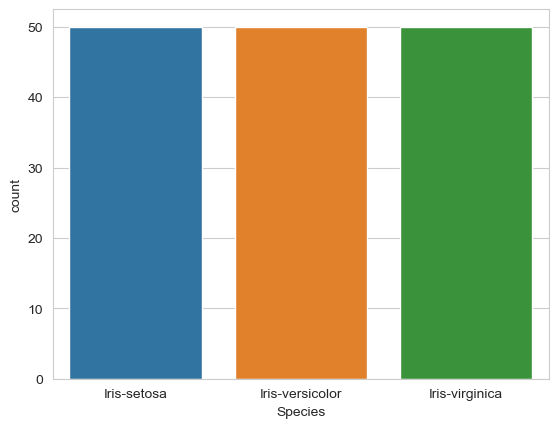

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Species',data=df)

### Data Preprocessing

In [32]:
df1 = df.drop('Id', axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualise the whole dataset

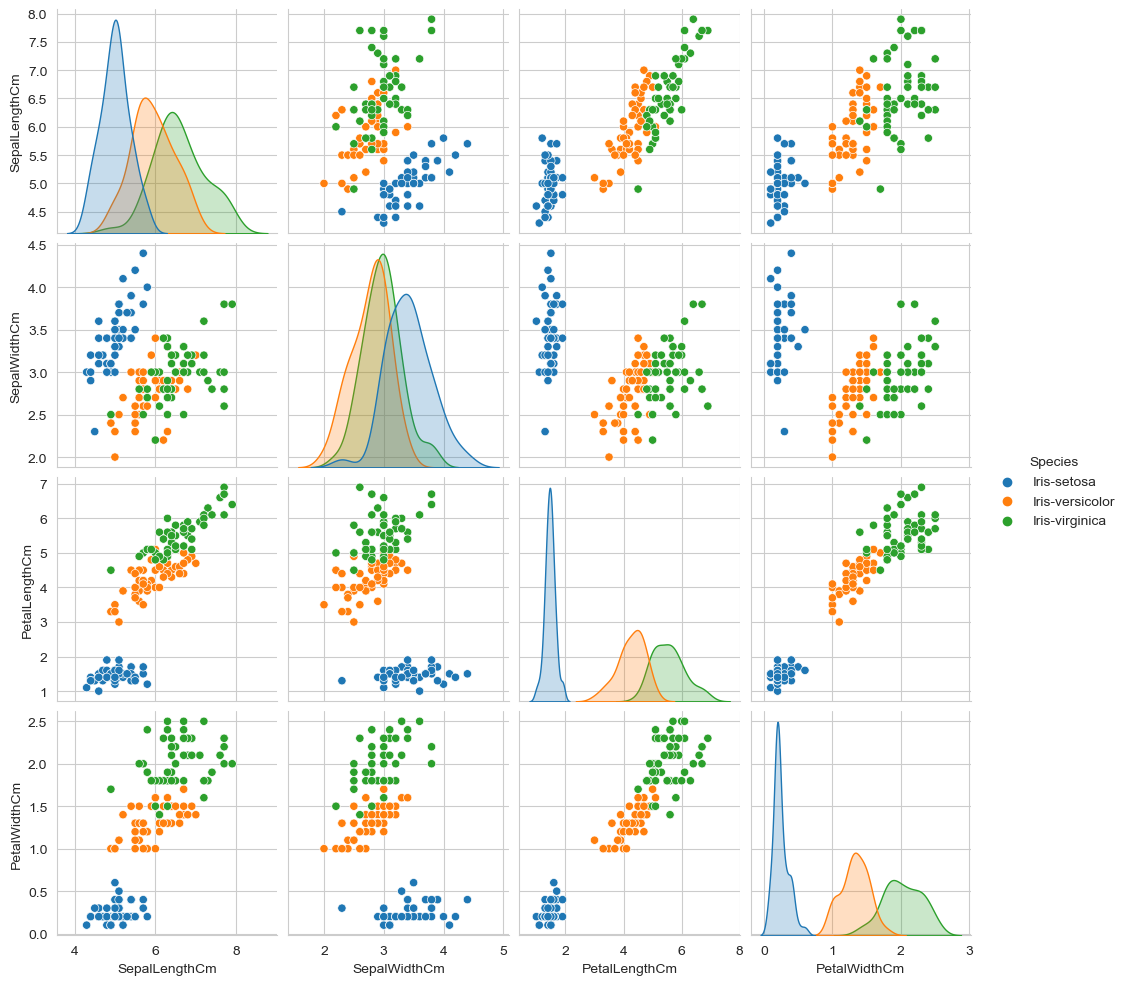

In [26]:

sns.pairplot(df1, hue='Species')
plt.show()

In [ ]:
Iris Setosa is easily distinguishable.

Iris Setosa has higher Sepal length.

Iris Setosa has lower Sepal width.

Iris Setosa has higher Petal length.

Iris Setosa has higher Petal width

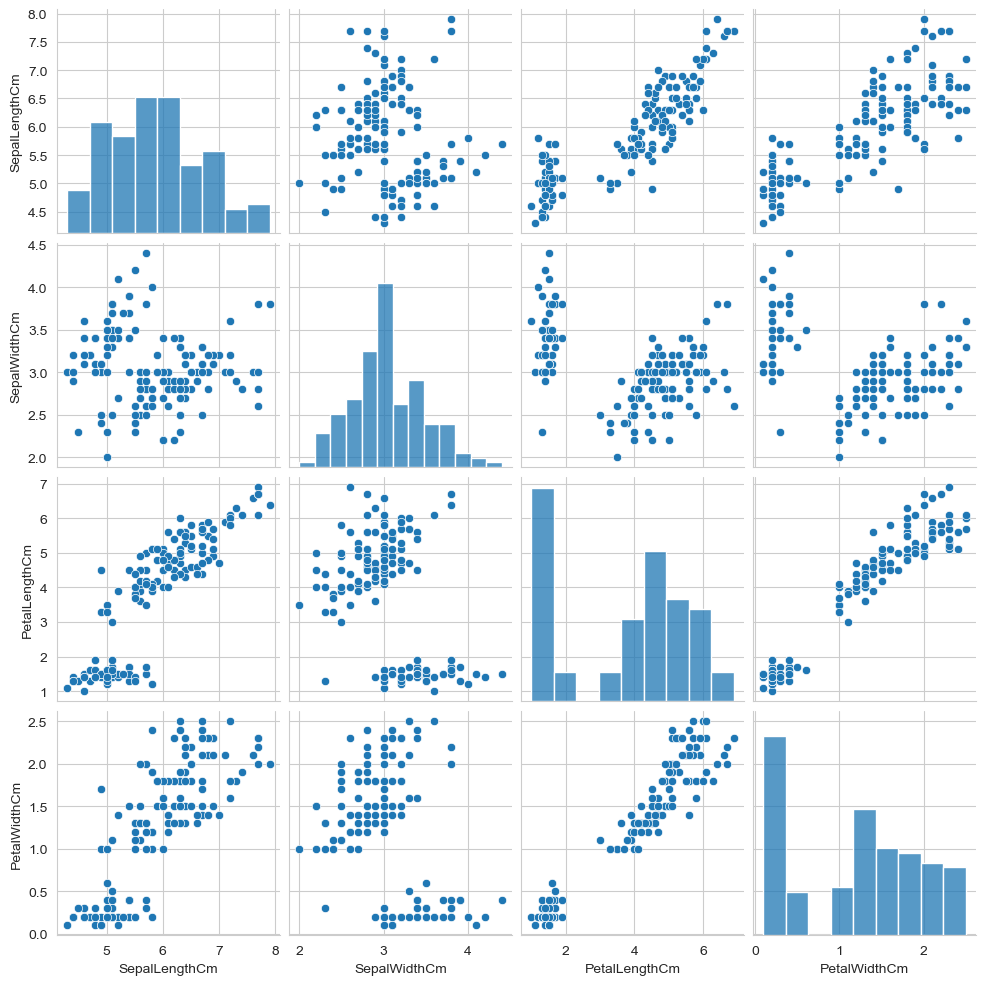

In [47]:
sns.pairplot(data=df1.drop(columns=['Species']))

## Visualising different columns with respect to classes

<Axes: xlabel='SepalLengthCm', ylabel='count'>

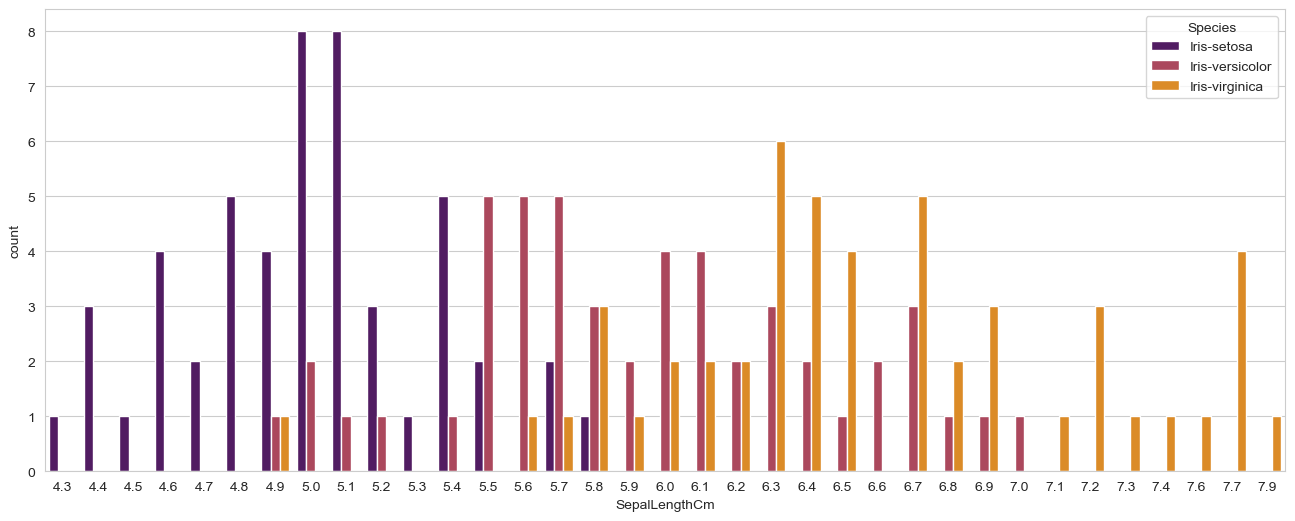

In [33]:
plt.figure(figsize = (16,6))
sns.countplot(data=df1, x="SepalLengthCm", hue = "Species", palette = 'inferno')

Density of Sentosa is more on lower sepal length and density of virginica is more on higher sepal length

<Axes: xlabel='SepalWidthCm', ylabel='count'>

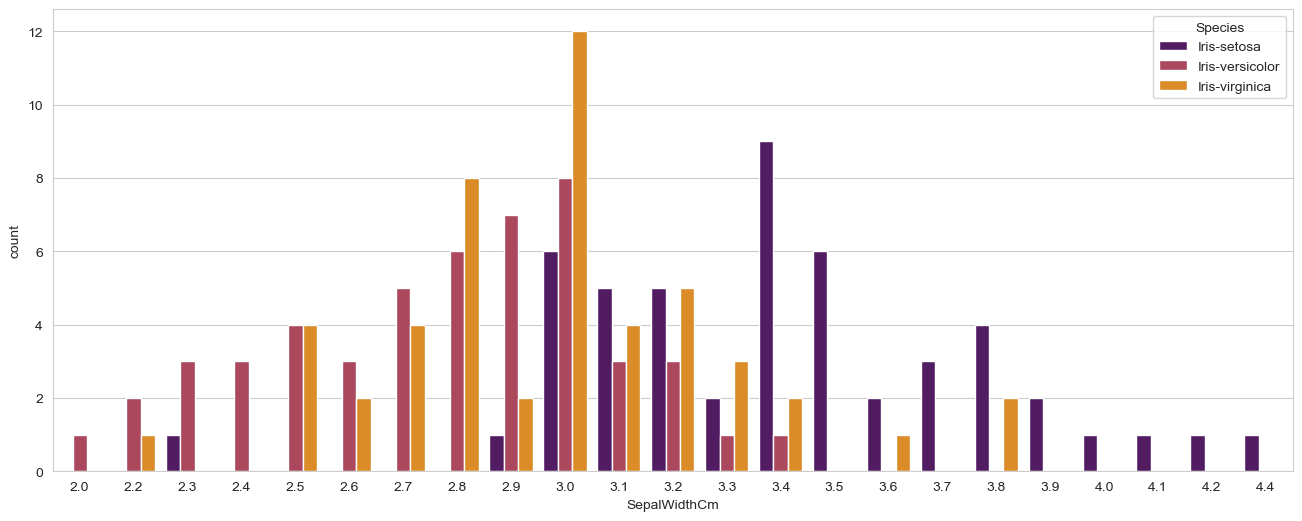

In [34]:
plt.figure(figsize = (16,6))
sns.countplot(data=df1, x="SepalWidthCm", hue = "Species", palette = 'inferno')


Density of Sentosa is more on higher sepal width and density of versicolor is more on higher sepal width

<Axes: xlabel='PetalLengthCm', ylabel='count'>

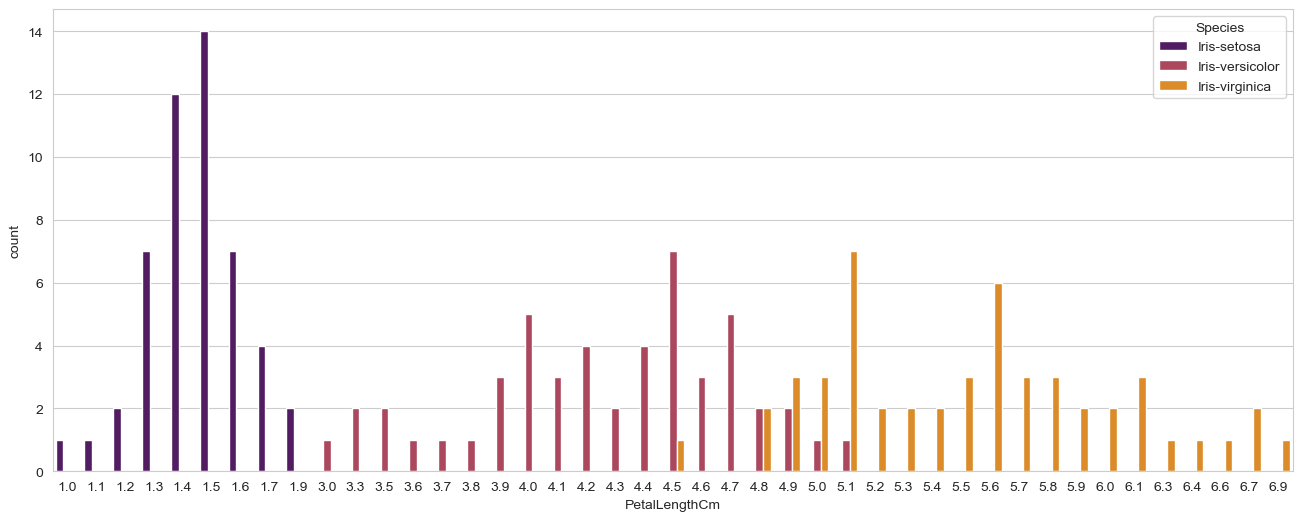

In [35]:
plt.figure(figsize = (16,6))
sns.countplot(data=df1, x="PetalLengthCm", hue = "Species", palette = 'inferno')


Density of Sentosa is more on lower petal length and density of virginica is more on higher petal length

<Axes: xlabel='PetalWidthCm', ylabel='count'>

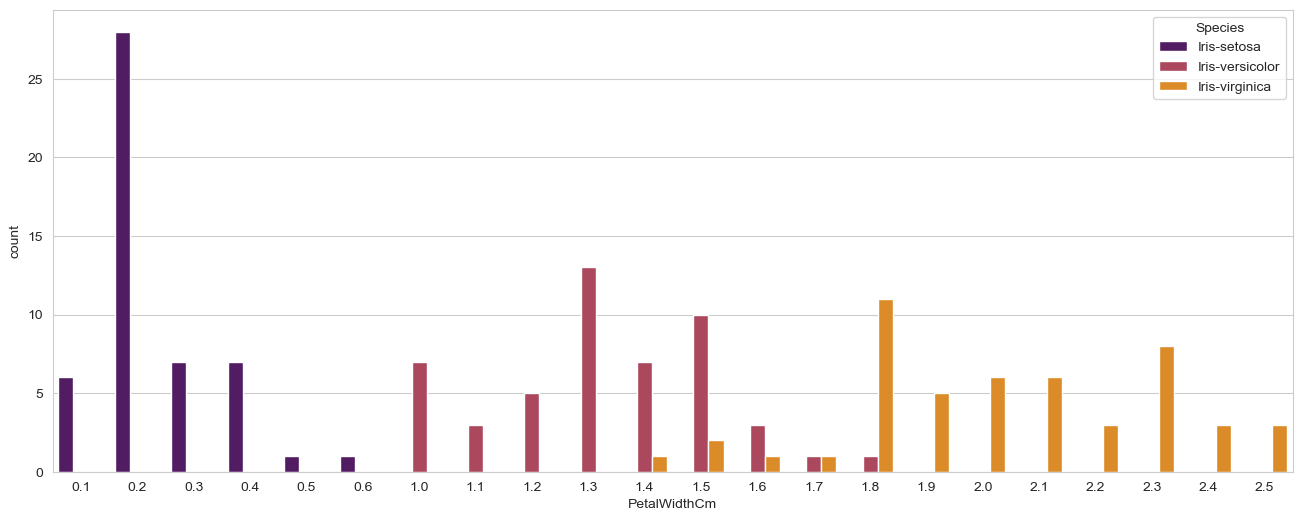

In [36]:
plt.figure(figsize = (16,6))
sns.countplot(data=df1, x="PetalWidthCm", hue = "Species", palette = 'inferno')


Density of Sentosa is more on lower petal width and density of virginica is more on higher petal width

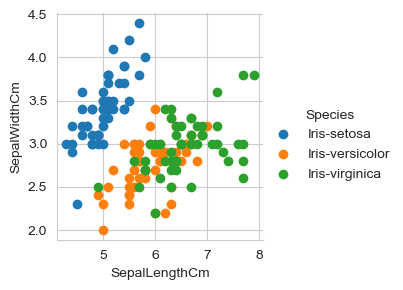

In [37]:
sns.set_style('whitegrid')
sns.FacetGrid(df1, hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

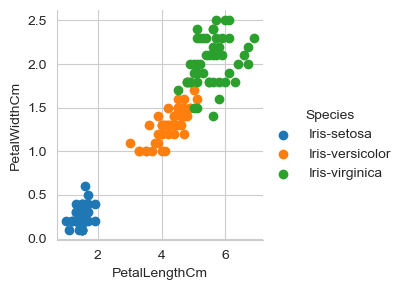

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(df1, hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()


### Box Plot

Text(0.5, 1.0, 'Boxplot of Sepal length')

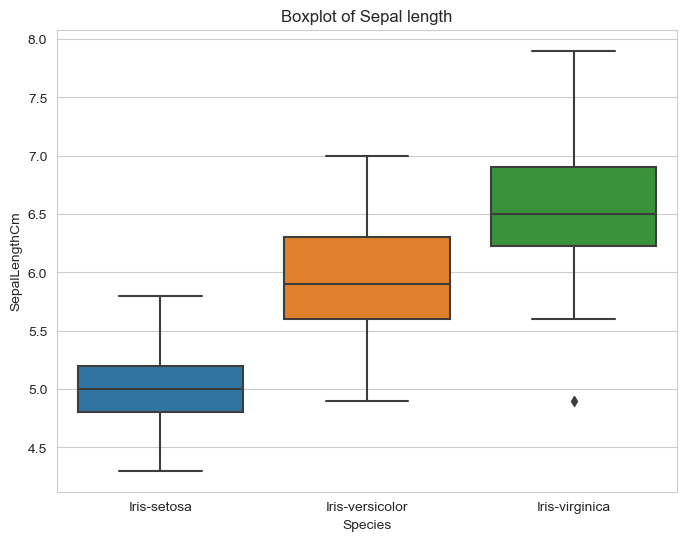

In [28]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="Species",y="SepalLengthCm",data=df1)
plt.title("Boxplot of Sepal length")


Text(0.5, 1.0, 'Boxplot of Sepal Width')

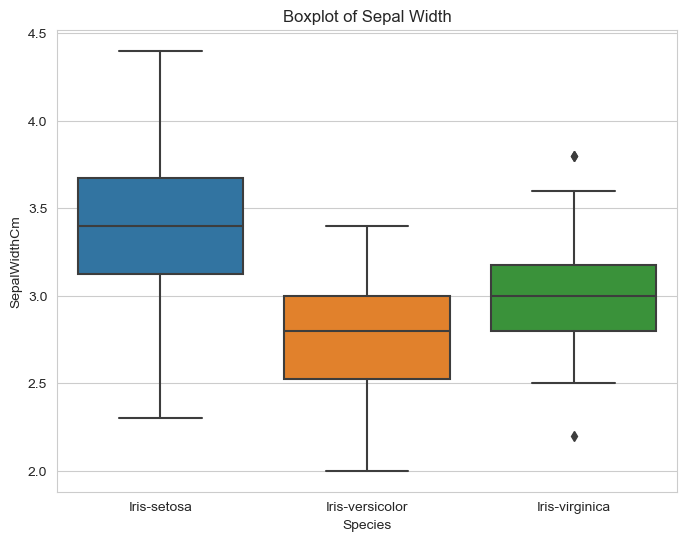

In [29]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="Species",y="SepalWidthCm",data=df1)
plt.title("Boxplot of Sepal Width")


Text(0.5, 1.0, 'Boxplot of Petal length')

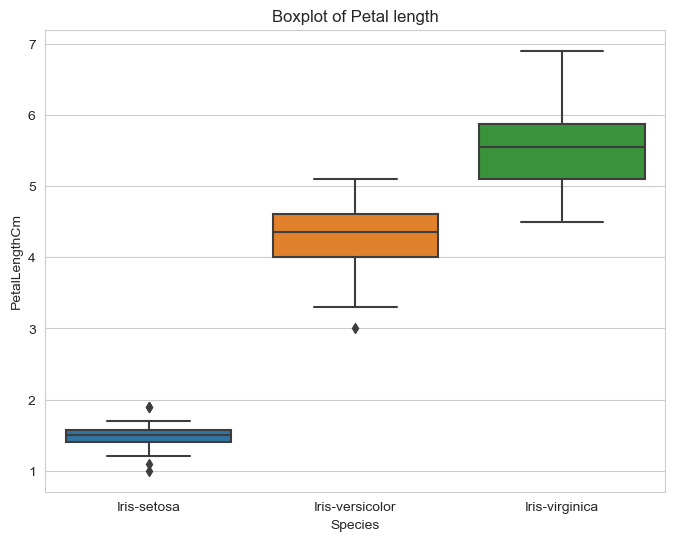

In [30]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="Species",y="PetalLengthCm",data=df1)
plt.title("Boxplot of Petal length")


Outliers is present.

Text(0.5, 1.0, 'Boxplot of Petal Width')

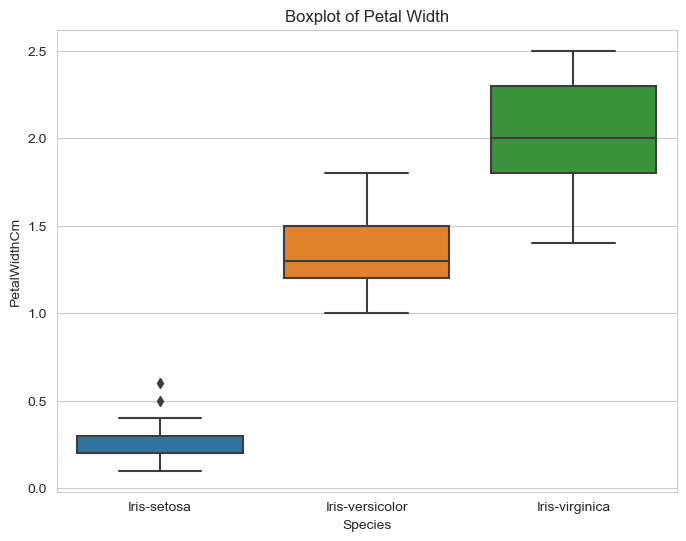

In [31]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="Species",y="PetalWidthCm",data=df1)
plt.title("Boxplot of Petal Width")


## Correlation metrics

In [39]:
df1.corr()

C:\Users\shromana\AppData\Local\Temp\ipykernel_7660\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Correlation between the numerical variables

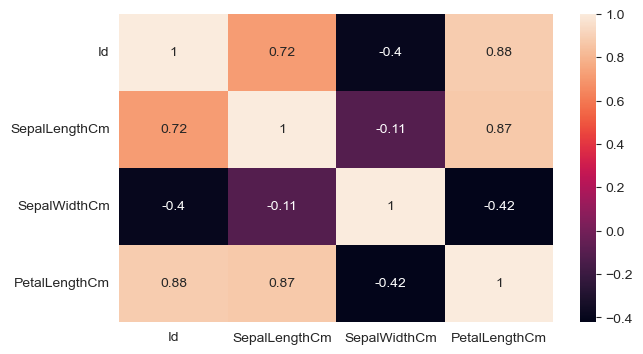

In [40]:
plt.figure(figsize=(7,4))
d=df.iloc[:,0:4]
sns.heatmap(d.corr(),annot=True)
plt.show()

There is negative correlation between sepal-length and sepal-width, petal length and sepal width, petal width and sepal width. petal length and petal width are highly correlated.

## K Means Clustering

#### Finding the optimum number of clusters for k-means classification

In [51]:

X = df.iloc[:, [ 1, 2, 3,4]].values


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
clusters_df = pd.DataFrame({'num_clusters':range(1,11),'cluster_errorss':wcss})
clusters_df

C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

,num_clusters,cluster_errorss
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.561630
5,6,38.930963
6,7,34.190688
7,8,30.063874
8,9,27.879288
9,10,26.048202


### Plotting the results onto a line graph,to observe 'The elbow'

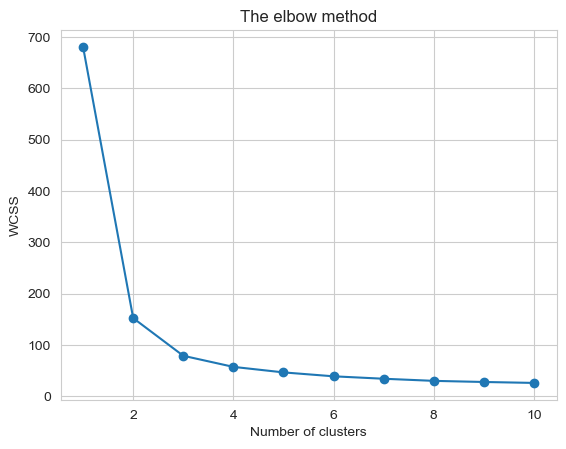

In [52]:

plt.plot(range(1, 11), wcss,'-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this the number of clusters can be chosen as  '3'.

## Creating the kmeans classifier

In [19]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\shromana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [43]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualising the clusters 

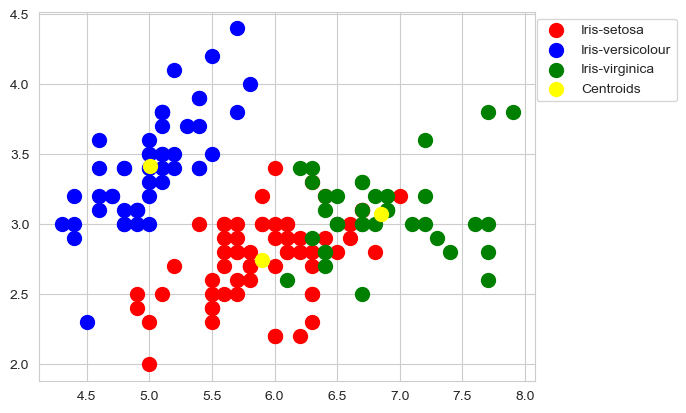

In [44]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.3,1))

## Load the model

In [24]:
import pickle
with open('KMeans_model.pkl','wb') as file:
    pickle.dump( kmeans,file)